In [4]:
from selenium import webdriver
driver = webdriver.Chrome('/opt/local/common/chromedriver')

In [5]:
driver.get('https://www.8899.click/online/comic-103.html?ch=951')

In [7]:
#driver.page_source

In [8]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'lxml')

In [11]:
print('https:' + soup.select_one('#TheImg').get('src'))

https://img3.8comic.com/2/103/951/001_DnD.jpg


In [21]:
import requests
res = requests.get('https://img3.8comic.com/2/103/951/001_DnD.jpg')
with open('test.jpg', 'wb') as f:
    f.write(res.content)

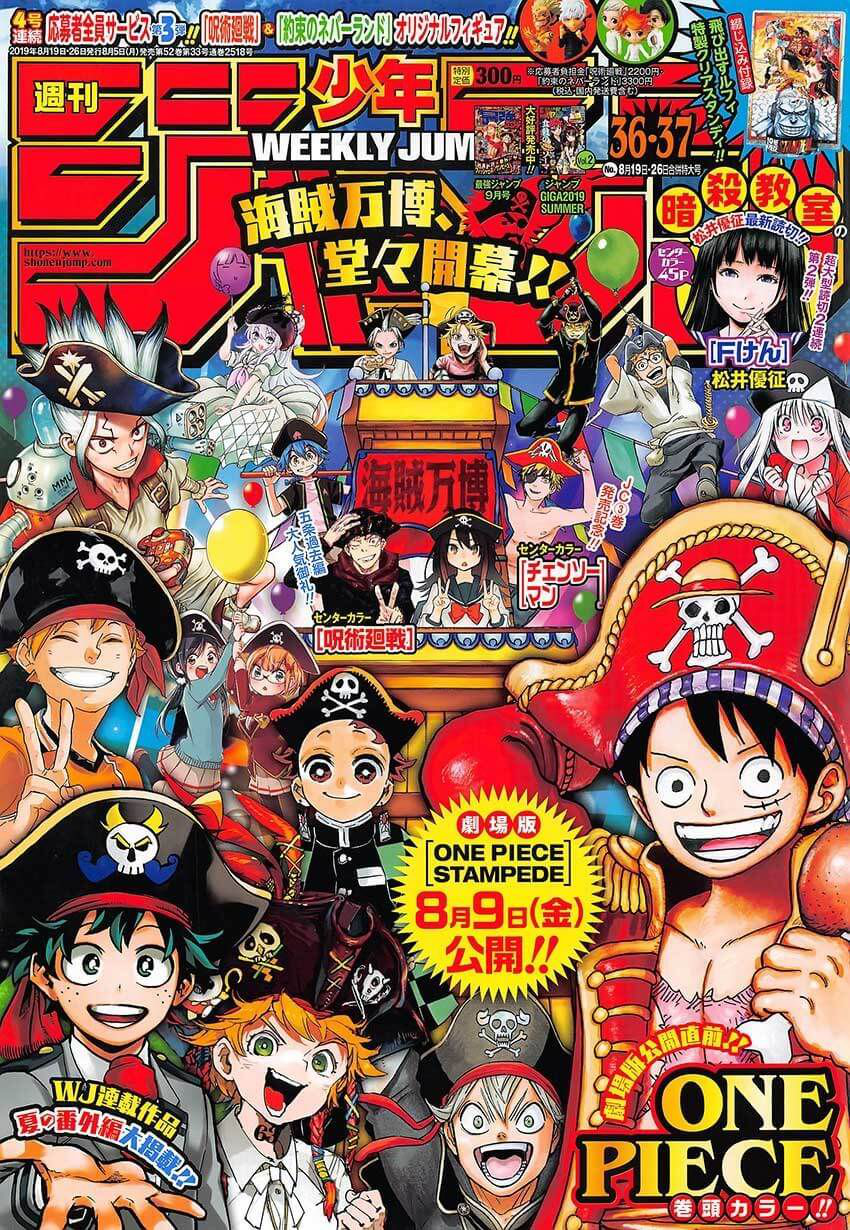

In [22]:
from PIL import Image
Image.open('test.jpg')

In [17]:
pagenum = int(soup.select_one('#pagenum').text.split('/')[1].strip('頁'))

In [23]:
import time
pageurl = 'https://www.8899.click/online/comic-103.html?ch=951-{}'
for i in range(pagenum):
    driver.get(pageurl.format(i+1))
    soup = BeautifulSoup(driver.page_source, 'lxml')
    imgurl = 'https:' + soup.select_one('#TheImg').get('src')
    res = requests.get(imgurl)
    with open('{}.jpg'.format(i), 'wb') as f:
        f.write(res.content)
    time.sleep(1)